In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.patches import Ellipse
import matplotlib.patheffects as path_effects
import matplotlib.animation as animation
from matplotlib import rc
import seaborn as sns
import requests
import time
import json
import fotmob_scraper as fms
from tqdm import tqdm

In [2]:
df_teams = pd.read_csv('data/super_leagues_team_stats_2122.csv')

In [3]:
df_games = pd.read_csv('data/super_leagues_game_stats_2122.csv')

In [4]:
team_colors: dict = {
    'BAS': '#FF1433', 
    'ZUR': '#00BFFF', 
    'GRA': '#0064B9', 
    'LAU': '#006EB7', 
    'LUG': '#000000', 
    'LUZ': '#154281', 
    'SER': '#870E26', 
    'SIO': '#EC1F00', 
    'GAL': '#008141',
    'YB': '#FFD940', 
    'AVG': '#FFFFFF'
}

In [5]:
team_logo_url = {
    'YB': "https://images.fotmob.com/image_resources/logo/teamlogo/10192.png", 
    'LUZ': "https://images.fotmob.com/image_resources/logo/teamlogo/10199.png", 
    'GAL': "https://images.fotmob.com/image_resources/logo/teamlogo/10190.png", 
    'LAU': "https://images.fotmob.com/image_resources/logo/teamlogo/7730.png", 
    'LUG': "https://images.fotmob.com/image_resources/logo/teamlogo/7896.png", 
    'ZUR': "https://images.fotmob.com/image_resources/logo/teamlogo/10243.png", 
    'GRA': "https://images.fotmob.com/image_resources/logo/teamlogo/9956.png", 
    'BAS': "https://images.fotmob.com/image_resources/logo/teamlogo/9931.png",
    'SER': "https://images.fotmob.com/image_resources/logo/teamlogo/9777.png",
    'SIO': "https://images.fotmob.com/image_resources/logo/teamlogo/10179.png"
    }

In [6]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Average xG per Game for Super League Teams

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


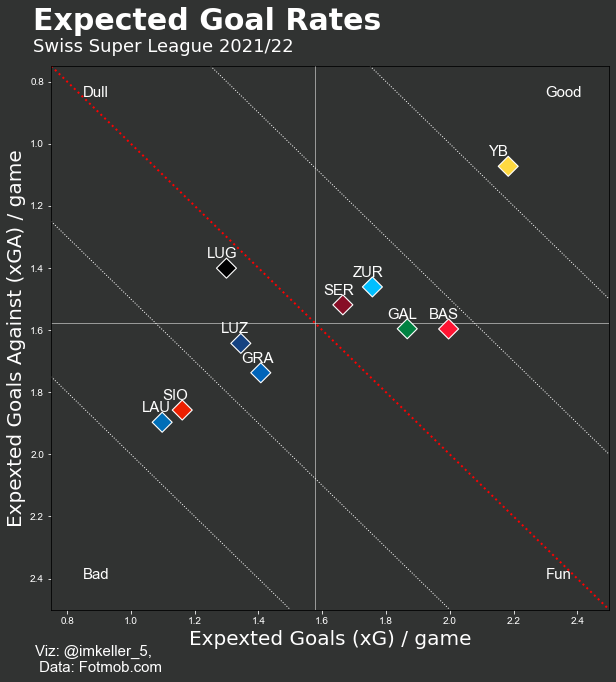

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

season = "2021/22"
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#313332"
edge = "white"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw=0,color=text_color, zorder=1)

plt.style.use(['seaborn-darkgrid','seaborn-poster'])
ax.axvline(df_teams['expected_goals_against_(xga)_mean'].mean(), color=text_color, linewidth=0.5, zorder=5)
ax.axhline(df_teams['expected_goals_(xg)_mean'].mean(), color=text_color, linewidth=0.5, zorder=0)
sns.scatterplot(x='expected_goals_(xg)_mean', y='expected_goals_against_(xga)_mean',hue='team_short',palette=team_colors,data=df_teams, s=200,legend=False,marker='D',zorder=10)
ax.set_xlabel('Expexted Goals (xG) / game',fontfamily=title_font,fontsize=20,color=text_color)
ax.set_ylabel('Expexted Goals Against (xGA) / game',fontfamily=title_font,fontsize=20,color=text_color)

fig.text(0.1,0.93,'Expected Goal Rates', fontsize=30, fontfamily=title_font, color=text_color, fontweight='bold')
fig.text(0.1,0.90,'Swiss Super League 2021/22', fontweight='regular',fontsize=18, fontfamily=title_font,color=text_color)




ax.set_xlim(0.75,2.5)
ax.set_ylim(0.75,2.5)

ax.axline(xy1=(0, 0), slope=1, color='r', lw=2,ls='dotted')
ax.axline(xy1=(0.5, 0), slope=1, color=text_color, lw=1,ls='dotted')
ax.axline(xy1=(-0.5, 0), slope=1, color=text_color, lw=1,ls='dotted')
ax.axline(xy1=(1, 0), slope=1, color=text_color, lw=1,ls='dotted')
ax.axline(xy1=(-1, 0), slope=1, color=text_color, lw=1,ls='dotted')



ax.axes.invert_yaxis()

ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)


for a in df_teams['team_short']:
    ax.annotate(a, (df_teams.loc[df_teams['team_short'] == a,'expected_goals_(xg)_mean'].values[0],df_teams.loc[df_teams['team_short'] == a,'expected_goals_against_(xga)_mean'].values[0]), xytext=(-20,10), textcoords='offset points', fontsize=15,color=text_color)

ax.annotate("Viz: @imkeller_5, \n Data: Fotmob.com", (0.7, 2.7), annotation_clip=False, fontsize=15,color=text_color)
ax.annotate("Good", (2.3, 0.85), annotation_clip=False, fontsize=15,color=text_color)
ax.annotate("Dull", (0.85, 0.85), annotation_clip=False, fontsize=15,color=text_color)
ax.annotate("Bad", (0.85, 2.4), annotation_clip=False, fontsize=15,color=text_color)
ax.annotate("Fun", (2.3, 2.4), annotation_clip=False, fontsize=15,color=text_color)
plt.show()

fig.savefig('figs/super_league_xg_rates_25_02_22.jpg',bbox_inches='tight')

- Young Boys are able to create good chances and are good at preventing good chances
- FCB creates a lot of good chances but also lets the opponent get a good amount
- FCZ create a good amount of xG and don't lets their opponents have too much 

## Goals Over Expected for and against  

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


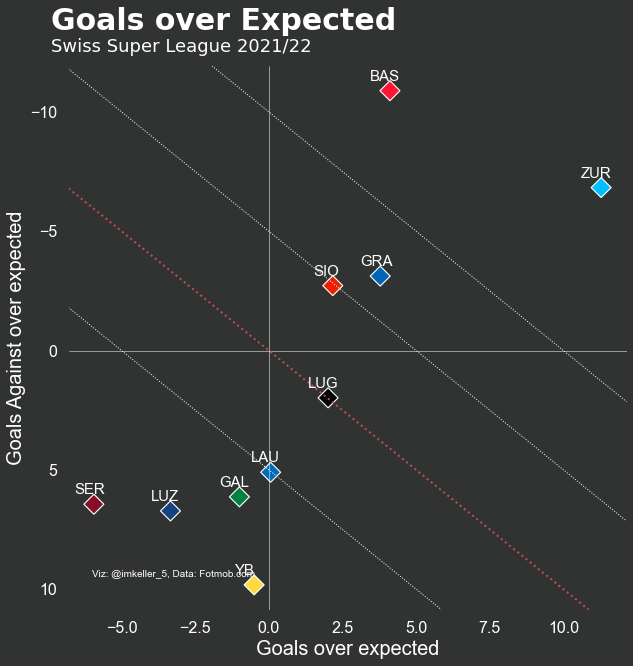

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

season = "2021/22"
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#313332"
edge = "white"

mpl.rcParams['xtick.color'] = text_color  
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw=0,color=text_color, zorder=1)

sns.scatterplot(x=df_teams['goals_over_expected_sum'], y=df_teams['goals_against_over_expected_sum'],hue=df_teams['team_short'],palette=team_colors, s=200,legend=False,marker='D')
ax.set_xlabel('Goals over expected',fontsize=20, color=text_color)
ax.set_ylabel('Goals Against over expected',fontsize=20, color=text_color)
fig.text(0.1,0.93,'Goals over Expected', fontsize=30, fontfamily=title_font, color=text_color, fontweight='bold')
fig.text(0.1,0.90,'Swiss Super League 2021/22', fontweight='regular',fontsize=18, fontfamily=title_font,color=text_color)

ax.axvline(0, linewidth=0.5, color=text_color)
ax.axhline(0, linewidth=0.5, color=text_color)
ax.axline(xy1=(0, 0), slope=1, color='r', lw=2, ls='dotted')
ax.axline(xy1=(5, 0), slope=1, color=text_color, lw=1, ls='dotted')
ax.axline(xy1=(-5, 0), slope=1, color=text_color, lw=1, ls='dotted')
ax.axline(xy1=(10, 0), slope=1, color=text_color, lw=1, ls='dotted')

ax.axes.invert_yaxis()

for a in df_teams['team_short']:
    ax.annotate(a, (df_teams.loc[df_teams['team_short'] == a,'goals_over_expected_sum'].values[0],df_teams.loc[df_teams['team_short'] == a,'goals_against_over_expected_sum'].values[0]), xytext=(-20,10), textcoords='offset points', fontsize=15,color=text_color)

ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)

ax.annotate("Viz: @imkeller_5, Data: Fotmob.com", (-6, 9.5), annotation_clip=False, fontsize=10, color=text_color)
sns.set_theme()
plt.show()

fig.savefig('figs/super_league_goals_over_expected_25_02_22.jpg',bbox_inches='tight')

- Basel scores around the expected amount and have way less goals against than expected (Goalkeeping?)
- FCZ makes more out of their chances than expected and get not as much goals against from good chances
- Bern is good at getting more goals than expected out of their chances, but also concede more goals than the quality of chances suggests 

## Expected Goals Breakdown: Where are the chances coming from? 

In [9]:
df_teams['xg_diff_mean'] = df_teams['expected_goals_(xg)_mean'] - df_teams['expected_goals_against_(xga)_mean']

In [10]:
df_teams = df_teams.sort_values('xg_diff_mean',ascending=False)

In [11]:
df_teams[['team','xg_diff_mean']]

,team,xg_diff_mean
9,Young Boys,1.110667
0,Basel,0.400000
1,FC Zürich,0.296333
8,St. Gallen,0.271000
6,Servette,0.146000
4,Lugano,-0.101000
5,Luzern,-0.298000
2,Grasshopper,-0.330000
7,Sion,-0.696333
3,Lausanne,-0.798667


IndexError: list index out of range

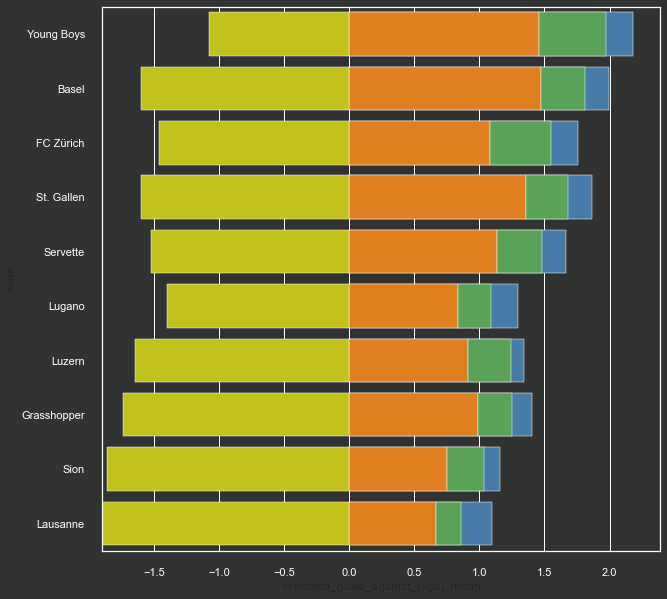

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
sns.set_palette("colorblind")

season = "2021/22"
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#313332"
edge = "white"

mpl.rcParams['xtick.color'] = text_color  
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)

sns.barplot(y=df_teams['team'],x=df_teams['expected_goals_(xg)_mean'],label='penalty xG',color=CB_color_cycle[0])
sns.barplot(y=df_teams['team'],x=df_teams['xg_open_play_mean'],label='open play xG',color=CB_color_cycle[1])
sns.barplot(y=df_teams['team'],x=df_teams['xg_set_play_mean'],label='set play xG',color=CB_color_cycle[2],left=df_teams['xg_open_play_mean'])
sns.barplot(y=df_teams['team'],x=df_teams['expected_goals_against_(xga)_mean'],label='penalty xGA',color=CB_color_cycle[8],left=-df_teams['expected_goals_against_(xga)_mean'])
sns.barplot(y=df_teams['team'],x=df_teams['xga_open_play_mean'],label='open play xGA',color=CB_color_cycle[9],left=-df_teams['xga_open_play_mean'])
sns.barplot(y=df_teams['team'],x=df_teams['xga_set_play_mean'],label='set play xGA',color=CB_color_cycle[7],left=-df_teams['xga_open_play_mean']-df_teams['xga_set_play_mean'])

ax.axvline(0, linewidth=2,color=text_color)
ax.set_xlim(-2.5,2.5)

ax.set_ylabel('Teams',fontsize=20, color=text_color)
ax.set_xlabel('',fontsize=20)
fig.text(-0.05,0.93,'Expected Goals Breakdown', fontsize=30, fontfamily=title_font, color=text_color, fontweight='bold')
fig.text(-0.05,0.90,'Swiss Super League 2021/22', fontweight='regular',fontsize=18, fontfamily=title_font,color=text_color)
ax.legend(loc="center left",bbox_to_anchor=(1, 0.5), frameon=True)
ax.annotate("Viz: @imkeller_5, Data: Fotmob.com", (-3.5,11), annotation_clip=False, fontsize=10, color=text_color)
ax.annotate("expected goals against / game", (-2.5, 10.5), annotation_clip=False, fontsize=20, color=text_color)
ax.annotate("expected goals / game", (0.25, 10.5), annotation_clip=False, fontsize=20, color=text_color)
plt.show()

fig.savefig('figs/super_league_xg_breakdown_25_02_22.jpg',bbox_inches='tight')


- Young Boys create a lot of good amount chances from open play and don't let a lot of good chances happen
- FCZ creates a lot of good chances from set plays 
- Basel creates a lot and lets a lot of good chances happen from open play

## Rolling xG Rates over 5 games 

In [ ]:
df_games['xg_diff'] = df_games['expected_goals_(xg)'] - df_games['expected_goals_against_(xga)']

In [ ]:
df_games.columns

Index(['Unnamed: 0', 'ball_possession', 'expected_goals_(xg)', 'total_shots',
       'big_chances', 'big_chances_missed', 'accurate_passes',
       'fouls_committed', 'offsides', 'corners', 'shots_off_target',
       'shots_on_target', 'blocked_shots', 'hit_woodwork', 'shots_inside_box',
       'shots_outside_box', 'xg_first_half', 'xg_second_half', 'xg_open_play',
       'xg_set_play', 'xg_on_target_(xgot)', 'passes', 'own_half',
       'opposition_half', 'accurate_long_balls', 'accurate_crosses', 'throws',
       'tackles_won', 'interceptions', 'blocks', 'clearances', 'keeper_saves',
       'duels_won', 'ground_duels_won', 'aerial_duels_won',
       'successful_dribbles', 'yellow_cards', 'red_cards', 'match_id', 'team',
       'team_short', 'goals', 'goals_against', 'match_round', 'pass_accuracy',
       'longball_accuracy', 'cross_accuracy', 'tackles_won_percentage',
       'ground_duels_won_percentage', 'aerial_duels_won_percentage',
       'successful_dribbles_percentage', 'expect

In [ ]:
df_rolling = pd.DataFrame()

In [ ]:
for team in df_games['team'].unique():
    df_rolling['{}'.format(df_games.loc[df_games['team']==team,"team_short"].values[0])]= df_games.loc[df_games['team']==team].set_index('match_round').rolling(5,min_periods=1).sum()['xg_diff']

In [ ]:
df_rolling

,LUZ,YB,LAU,GAL,LUG,ZUR,GRA,BAS,SIO,SER
match_round,,,,,,,,,,
1,-0.72,0.72,-1.42,1.42,0.02,-0.02,-0.35,0.35,-0.51,0.51
2,-1.32,2.23,-2.63,2.02,-0.25,1.19,-1.86,4.04,-4.20,0.78
3,-2.75,3.71,-3.98,2.51,-0.74,2.62,-0.51,8.24,-5.68,-3.42
4,-4.49,5.90,-5.27,3.63,0.17,3.32,-1.21,9.53,-6.80,-1.68
5,-3.78,4.01,-5.98,3.19,-1.35,3.76,-0.63,9.23,-6.19,-2.26
6,-3.78,7.45,-4.36,0.80,-1.79,0.34,0.44,9.32,-5.88,-1.80
7,-3.36,9.71,-6.13,-0.18,-1.96,-2.29,2.10,6.01,-2.01,-0.65
8,-1.34,9.63,-5.39,-2.10,-2.28,-3.42,2.47,1.51,-2.25,4.16
9,-0.65,12.11,-5.69,-3.23,-0.20,-3.42,3.18,1.27,-1.83,-1.54


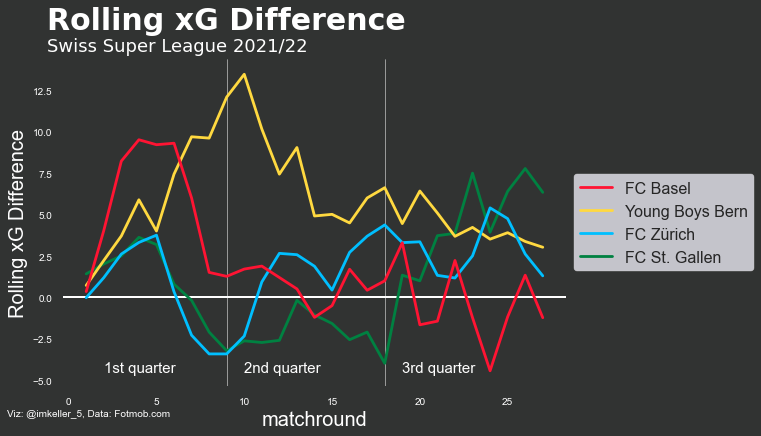

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
sns.set_palette("colorblind")

season = "2021/22"
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#313332"
edge = "white"

mpl.rcParams['xtick.color'] = text_color  
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig.set_facecolor(background)
ax.patch.set_alpha(0)
ax.grid(ls="dotted",lw=0,color=text_color, zorder=1)

ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)
sns.lineplot(x=df_rolling.index, y=df_rolling['BAS'], label='FC Basel', color=team_colors['BAS'],zorder=30)
sns.lineplot(x=df_rolling.index, y=df_rolling['YB'], label='Young Boys Bern',color=team_colors['YB'],zorder=20)
sns.lineplot(x=df_rolling.index, y=df_rolling['ZUR'], label='FC Zürich',color=team_colors['ZUR'],zorder=25)
sns.lineplot(x=df_rolling.index, y=df_rolling['GAL'], label='FC St. Gallen',color=team_colors['GAL'],zorder=19)
ax.axhline(0, linewidth=2,zorder=0,color=text_color)
ax.axvline(9, linewidth=0.5,zorder=5,color=text_color)
ax.axvline(18, linewidth=0.5,zorder=10,color=text_color)
ax.set_xlabel('matchround',fontsize=20, color=text_color)
ax.set_ylabel('Rolling xG Difference',fontsize=20, color=text_color)
fig.text(0.1,0.95,'Rolling xG Difference', fontsize=30, fontfamily=title_font, color=text_color, fontweight='bold')
fig.text(0.1,0.90,'Swiss Super League 2021/22', fontweight='regular',fontsize=18, fontfamily=title_font,color=text_color)
ax.annotate("Viz: @imkeller_5, Data: Fotmob.com", (-3.5,-7.2), annotation_clip=False, fontsize=10, color=text_color)
ax.annotate("1st quarter", (2, -4.5), annotation_clip=False, fontsize=15, color=text_color)
ax.annotate("2nd quarter", (10, -4.5), annotation_clip=False, fontsize=15, color=text_color)
ax.annotate("3rd quarter", (19, -4.5), annotation_clip=False, fontsize=15, color=text_color)


ax.legend(loc="center left",bbox_to_anchor=(1, 0.5), frameon=True)

fig.savefig('figs/super_league_rolling_xg_difference_25_02_22.jpg',bbox_inches='tight')

- FCB good first quarter, bad 2nd quarter 
- FCZ rose to the top in the 2nd quarter, regressing at the beginning of the third
- YB lows at the beginningof the first quarter and middle of 2nd quarter but continously good. 